# Iris flower

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print('target_names: '+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head()

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


將資料分割成 70% train 30% test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']],
                                                    iris_data[['target']],
                                                    test_size=0.3,
                                                    random_state=0)

# 使用決策樹
用決策樹或是隨機森林時，不需要將資料標準化

In [5]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

使用熵，樹高設為3

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

預測結果，並比較

In [7]:
tree.predict(X_test)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [8]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [9]:
error = 0
for i, v in enumerate(tree.predict(X_test)):
    if v != y_test['target'].values[i]:
        error += 1
print(error)

0


用 score 函數計算正確率

In [10]:
tree.score(X_test, y_test['target'])

1.0

畫圖

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 決定圖片的 x 軸上下限
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # 決定圖片的 y 軸上下限
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # 建立格子點
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # reval() 是把高維度降成一維，新的陣列是個 2 row 的陣列
    # 但是我們要把 xx1 的元素放在第一欄 xx2 放在第二欄，所以要轉置
    # Z 只是每個格子點用分類器預測出來的結果
    Z = Z.reshape(xx1.shape) # 恢復成原本的維度
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 會畫出一條線，將平面切割成兩個區域
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)): # 先畫出所有 y=0 的點，再畫出所有 y=1 的點
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

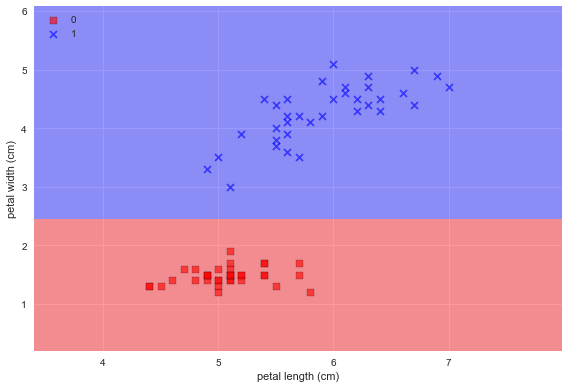

In [12]:
plt.style.use('seaborn')
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

使用 export_graphviz 函式來將樹的實際長相視覺化

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=['sepal length (cm)', 'petal width'])

# 使用決策樹判斷三個類別

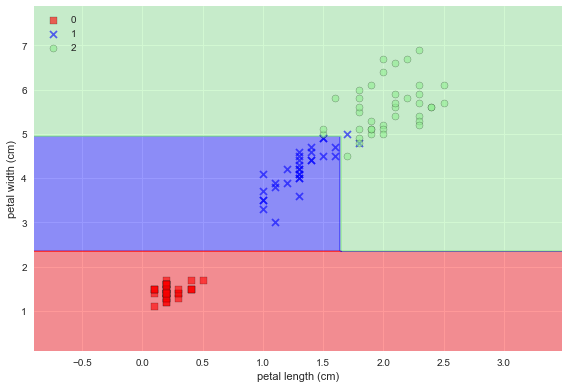

In [14]:
iris_data2 = pd.concat([x,y], axis=1)
iris_data2 = iris_data2[['petal width (cm)','petal length (cm)','target']]
iris_data.head()

X_train2, X_test2, y_train2, y_test2 = train_test_split(iris_data2[['petal width (cm)','petal length (cm)']],
                                                        iris_data2[['target']],
                                                        test_size=0.3,
                                                        random_state=0)

tree2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0)
tree2.fit(X_train2, y_train2)

plot_decision_regions(X_train2.values, y_train2['target'].values, classifier=tree2)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
export_graphviz(tree2, out_file='tree2.dot', feature_names=['sepal length (cm)','petal length (cm)'])

# 使用隨機森林
判斷三個類別

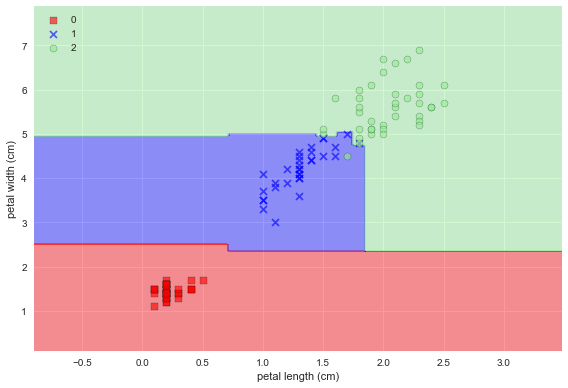

In [16]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=3, n_jobs=2)
forest.fit(X_train2, y_train2['target'].values)

plot_decision_regions(X_train2.values, y_train2['target'].values, classifier=forest)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()